# **Naive Bayes classifier for multinomial models**

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories = ['talk.politics.misc', 'talk.religion.misc', 'sci.med', 'sci.space', 'rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
print(train.data[5])

From: rts@nwu.edu (Ted Schreiber)
Subject: Opinions on recent Alfa Spiders
Nntp-Posting-Host: mac178.mech.nwu.edu
Organization: Mechanical Engineering
Lines: 15

Anyone have any opinions on fairly recent model Alfa Spiders ( 86-> ) 

Reliablilty for what their class ( I'm not talking Alfa vs. Toyota corrola
which is more relaible ) 

As far as I can discern, in recent years, there are 3 levels with all
basically the same mechanical aspects.

Please email any responses 


Ted Schreiber
Mechanical Enginering 
Northwestern University
Tel: 708.491.5386 FAX 708.491.3915 Email: rts@nwu.edu



In [4]:
print(train.data[15])

From: gnb@leo.bby.com.au (Gregory N. Bond)
Subject: Re: Why not give $1 billion to first year-long moon residents?
In-Reply-To: gene@theporch.raider.net's message of Sun, 18 Apr 1993 19:29:40 GMT
Nntp-Posting-Host: leo-gw
Organization: Burdett, Buckeridge & Young, Melbourne, Australia
Lines: 32

In article <6ZV82B2w165w@theporch.raider.net> gene@theporch.raider.net (Gene Wright) writes:

   Announce that a reward of $1 billion would go to the first corporation 
   who successfully keeps at least 1 person alive on the moon for a
   year. 

And with $1B on offer, the problem of "keeping them alive" is highly
likely to involve more than just the lunar environment! 

"Oh Dear, my freighter just landed on the roof of ACME's base and they
all died.  How sad.  Gosh, that leaves us as the oldest residents."

"Quick Boss, the slime from YoyoDyne are back, and this time they've
got a tank!  Man the guns!"

One could imagine all sorts of technologies being developed in that
sort of environment...

To use the text data for machine learning we need to convert each string into a vector of numbers. For this, I will be using tf-idf vectorizer and I will create a pipeline that attaches the tf-idf vector to a multinomial naive Bayes classifier. 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=1))

In [6]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

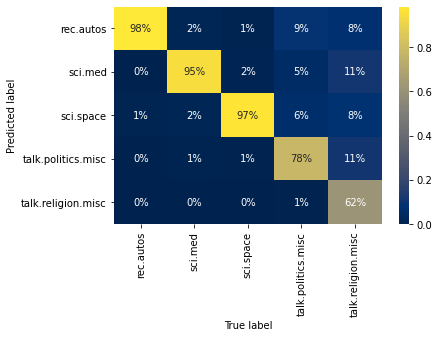

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

conf_mat = confusion_matrix(test.target, labels, normalize="true")

sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel("True label")
plt.ylabel("Predicted label");